<a href="https://colab.research.google.com/github/wildhugecoconut/Classification-model/blob/main/Jaume_de_SUP_ML_2_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SUP ML 2 - MODEL

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

# Carga clean data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_pickle("/content/drive/MyDrive/DSC 0523– Entregable 2 - Borrero, Dottori, He/Modelo/EJERCICIO-ML-Sup/data/ df_limpio_completo_Preprocessing_Final_ML_PK")

In [ ]:
df.shape

(89875, 190)

In [ ]:

from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold = 0.01)
vt.fit(df)
cols_lowvar = df.columns[vt.get_support()==False]
df.drop(columns=cols_lowvar,inplace=True)
print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())


60  low variance features were removed:
 ['crclscod_A2', 'crclscod_A3', 'crclscod_B2', 'crclscod_C2', 'crclscod_C5', 'crclscod_CC', 'crclscod_CY', 'crclscod_D', 'crclscod_D2', 'crclscod_D4', 'crclscod_D5', 'crclscod_E', 'crclscod_E2', 'crclscod_E4', 'crclscod_EC', 'crclscod_EF', 'crclscod_EM', 'crclscod_G', 'crclscod_GA', 'crclscod_GY', 'crclscod_H', 'crclscod_I', 'crclscod_IF', 'crclscod_J', 'crclscod_JF', 'crclscod_K', 'crclscod_L', 'crclscod_M', 'crclscod_O', 'crclscod_P1', 'crclscod_S', 'crclscod_TP', 'crclscod_U', 'crclscod_U1', 'crclscod_V', 'crclscod_V1', 'crclscod_W', 'crclscod_Y', 'crclscod_Z', 'crclscod_Z1', 'crclscod_Z2', 'crclscod_Z4', 'crclscod_Z5', 'crclscod_ZF', 'crclscod_ZY', 'hnd_webcap_UNKW', 'dwllsize_D', 'dwllsize_E', 'dwllsize_F', 'dwllsize_G', 'dwllsize_H', 'dwllsize_I', 'dwllsize_K', 'dwllsize_L', 'dwllsize_M', 'dwllsize_N', 'ethnic_D', 'ethnic_M', 'ethnic_P', 'ethnic_X']


In [ ]:
correlation_matrix = df.corr()

mean_correlation = correlation_matrix.mean().sort_values(ascending=False)

print("Correlación media con todas las demás variables:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(mean_correlation)

Correlación media con todas las demás variables:
complete              0.179992
avg3qty               0.177740
avg3mou               0.175796
peak_vce              0.171776
avg6mou               0.167612
avgqty                0.165164
mou_peav              0.162466
avgmou                0.161959
mou_rvce              0.161773
opk_vce               0.160804
owylis_vce            0.154073
mou_cvce              0.153573
adjmou                0.150965
avg6qty               0.146962
adjqty                0.141873
unan_vce              0.140963
avg3rev               0.140787
avgrev                0.139768
mou_opkv              0.139545
inonemin              0.137673
mouowylisv            0.135444
callwait              0.135083
rev                   0.135068
iwylis_vce            0.131771
drop_blk              0.131141
drop_vce              0.129483
ovrmou                0.124752
adjrev                0.120048
mouiwylisv            0.116036
vceovr                0.099239
totmrc               

In [ ]:
df.shape

(90000, 130)

# Distribución del target

In [ ]:
df['churn'].value_counts()

1    45800
0    44200
Name: churn, dtype: int64

array([[<Axes: title={'center': 'churn'}>]], dtype=object)

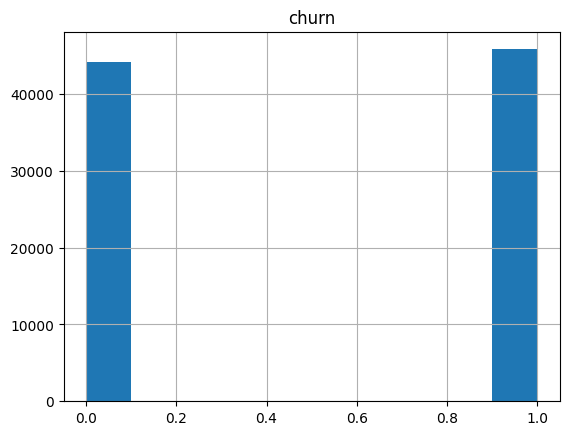

In [ ]:
df.hist('churn')

In [ ]:
proportion_churn = (df['churn'].value_counts()) / (len(df['churn'])) *100
proportion_churn

print(f'La distribucion de clientes que abandonan o permanecen en el servicio es proporcional')
print(f'{proportion_churn}')

La distribucion de clientes que abandonan o permanecen en el servicio es proporcional
1    50.888889
0    49.111111
Name: churn, dtype: float64


In [ ]:
target = 'churn'
features = df.columns[df.columns!=target]

X=df[features]
y=df[target]

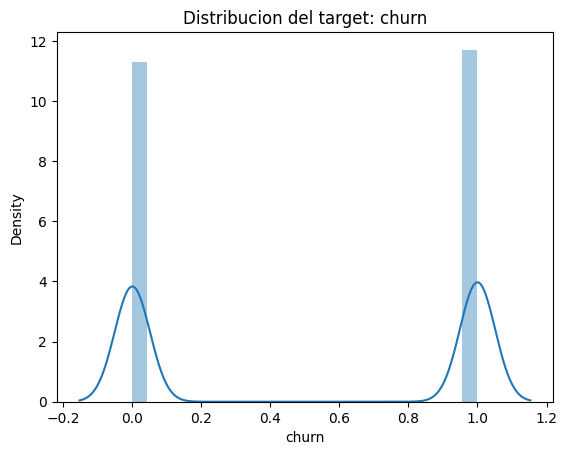

In [ ]:
sns.distplot(y)
plt.title('Distribucion del target: '+target)
plt.show()

# Undersampling (*)

**NOTA:** SOLO EN CLASIFICACIÓN cuando el ratio de éxitos está MUY DESBALANCEADO (<10%).

In [ ]:
target = 'churn'
features = df.columns[df.columns != target]

y = df[target]
X = df[features]

In [ ]:
pd.Series(y).value_counts() / len(y)

1    0.508889
0    0.491111
Name: churn, dtype: float64

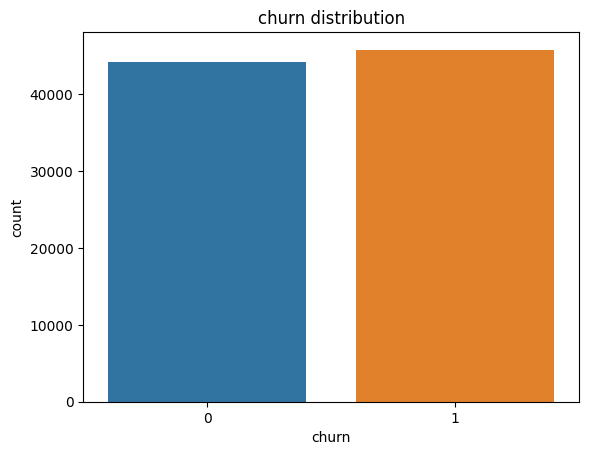

In [ ]:
sns.countplot(x=y)
plt.title(target+' distribution')
plt.show()

# Split TRAIN-TEST

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
print('--- TRAIN ---')
print('Size: {:,}'.format(len(y_train)))
print('Positive cases: {:,}'.format(sum(y_train)))
print('Positive rate: {:.2%}'.format(sum(y_train)/len(y_train)))
print('\n--- TEST ---')
print('Size: {:,}'.format(len(y_test)))
print('Positive cases: {:,}'.format(sum(y_test)))
print('Positive rate: {:.2%}'.format(sum(y_test)/len(y_test)))

--- TRAIN ---
Size: 76,500
Positive cases: 38,946
Positive rate: 50.91%

--- TEST ---
Size: 13,500
Positive cases: 6,854
Positive rate: 50.77%


In [ ]:
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 76500
Test set size: 13500


# Rescaling

* NO NECESARIO en modelos de Arboles de Decisión.
* Guardar scaler en el model path.

In [ ]:
# NO HACE FALTA

# TRAIN-VALIDA

## Torneo de Modelos

* Probamos una colección de modelos con el objetivo de conseguir el mejor rendimiento del modelo en los datos de VALIDACION.

In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,
                              scoring='roc_auc'
                              )
  return cross_val.mean()

In [ ]:
label_, auc_train_ , auc_valida_ = [], [], []

def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)
  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)
  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

In [ ]:
evaluate_classification (model = RandomForestClassifier(n_estimators=100, max_depth=3),
                    X=X_train, y=y_train)


,Model,AUC Train,AUC Cross-Valida
0,RandomForestClassifier(max_depth=3),0.621901,0.618573


In [ ]:
evaluate_classification (model = KNeighborsClassifier(n_neighbors = 10),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,RandomForestClassifier(max_depth=3),0.621901,0.618573
1,KNeighborsClassifier(n_neighbors=10),0.715222,0.560518


In [ ]:
evaluate_classification(model = XGBClassifier(n_estimators=100, max_depth=3),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
2,"XGBClassifier(base_score=None, booster=None, c...",0.712699,0.676915
0,RandomForestClassifier(max_depth=3),0.621901,0.618573
1,KNeighborsClassifier(n_neighbors=10),0.715222,0.560518


In [ ]:
evaluate_classification(model = LogisticRegression(),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
2,"XGBClassifier(base_score=None, booster=None, c...",0.712699,0.676915
0,RandomForestClassifier(max_depth=3),0.621901,0.618573
3,LogisticRegression(),0.599616,0.598183
1,KNeighborsClassifier(n_neighbors=10),0.715222,0.560518


In [ ]:
evaluate_classification(model = GradientBoostingClassifier(n_estimators=100, max_depth=3),
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
2,"XGBClassifier(base_score=None, booster=None, c...",0.712699,0.676915
4,GradientBoostingClassifier(),0.686899,0.670617
0,RandomForestClassifier(max_depth=3),0.621901,0.618573
3,LogisticRegression(),0.599616,0.598183
1,KNeighborsClassifier(n_neighbors=10),0.715222,0.560518


## Hiperparametrizacion

* Utilizar RandomSearch para probar diferentes configuraciones de los parametros del modelo ganador en el torneo de modelos con el objetivo de mejorar el control del overfitting.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
parametros = {
    'max_depth': [3, 6, 9],
    'n_estimators': [100,200,400],
    'min_child_weight': [1,2,3],
    'subsample' : [0.8],
    'alpha' : [0.5],
}

In [ ]:
random_search = RandomizedSearchCV(estimator = XGBClassifier(),
                  param_distributions = parametros,
                   n_iter = 20,
                   scoring = 'roc_auc',
                   cv = 4,
                   )

In [ ]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=20,
                   param_distributions={'alpha': [0.5], 'max_depth': [3, 6, 9],
                                        'min_child_weight': [1, 2, 3],
                                        'n_estimators': [100, 200, 400],
                                        'subsample': [0.8]},
                   scoring='roc_auc')

In [ ]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", random_search.best_estimator_)
print("\n The best AUC:", random_search.best_score_)
print("\n The best parameters across ALL searched params:\n", random_search.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: XGBClassifier(alpha=0.5, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

 The best AUC: 0.6778791976278676

 The best parameters across ALL searched params:
 {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 2, 'max_depth': 3, 'alpha': 0

## Modelo final

* Entrenar el modelo final con el algoritmo y los parametros que hanfuncionado mejor en anteriores experimentos.
* Argumentar la elección.
* Guardar el modelo en model path.

In [ ]:
model = random_search.best_estimator_

In [ ]:
print('AUC Train:', auc(model, X_train, y_train))

AUC Train: 0.7362676124989713


In [ ]:
print('AUC CV:', auc_cross_validation(model, X_train, y_train))

AUC CV: 0.6778791976278676



INTERPRETACION DEL MODELO : Entre los modelos con que hemos experimentado, hemos elegido el XGBoosClassifier dado que nos ha presentado el mejor valor de AUC training/AUC test. Los puntos de diferencia entre si, se encuentran dentro de lo aceptable 3-5 (AUC train - AUC test : 0.7363 0.6834 = 0.05) .

En el proceso de hiperparametrización, se probaron diferentes parametros y el mejor resultado se logró con un alpha = 0.5, éste parametro soporta la regularización del modelo evitando que sea tan complejo. Hemos optado por un subsampling de 0.8 tras varios intentos. Este parametro es la proporción de submuestra de las instancias de entrenamiento. Establecerlo en 0.5 significa que XGBoost muestrearía aleatoriamente la mitad de los datos de entrenamiento antes de cultivar árboles y esto evitará el sobreajuste. Como este dataset tiene una proporcion muy balanceada de los datos, casi un 50 y 50, decidimos que submuestrar a 0.8 daria mayor variabilidad y evitaria sobreajuste.

Aplicamos alpha = 0.5 (L1) como norma reguladora de coeficientes/variables de menor peso. De acuerdo al df que analizamos, a nuestro criterio, muchas variables sobre la informacion familiar del cliente son irrelevantes para la resolucion del problema, luego lo constantamos al sopesar el peso de las features, de modo que este parametro decidimos usarlo y quedarnos con XGBoostClassifier ya que estaba alineado con nuestro criterio para afrontar este problema, reducir el peso de las variables poco importantes. En otra version del modelo, se probo de combinar alpha con lambda (L2) que se ocupa de minimizar el peso de las variables de gran peso, pero esta combinacion no tuvo buenos resultados.


AUC: 0.66
    'max_depth': [3,6,9],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1,2,3],
    'subsample' : [0.2]
     n_iter = 12

AUC: 0.6770
    'max_depth': [3,6,9],
    'n_estimators': [100, 200, 400],
    'min_child_weight': [2,3,4],
    'subsample' : [0.8],
    'alpha' : [0.1]

AUC: 0.6749
    'max_depth': [3,6,9],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1,2,3],
    'subsample' : [0.5]
     n_iter = 13

AUC: 0.6700
    'max_depth': [6,9,12],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [2,3,4],
    'subsample' : [0.8]
     n_iter = 13

AUC: 0.6770
    'max_depth': [3,6,9],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [2,3,4],
    'subsample' : [0.8]
     n_iter = 13

AUC: 0.6770
    'max_depth': [3,6,9],
    'n_estimators': [100, 200, 400],
    'min_child_weight': [1,2,3],
    'subsample' : [0.8]
     n_iter = 13

AUC: 0.6762
    'max_depth': [3,6,9],
    'n_estimators': [100, 200, 400],
    'min_child_weight': [2,3,4],
    'subsample' : [0.8]
     n_iter = 13

AUC: 0.6777
    'max_depth': [6,9,12],
    'n_estimators': [100, 200, 400],
    'min_child_weight': [1,2,3],
    'subsample' : [0.8],
    'lambda' : [0.5]
    'alpha' : [0.3]
     n_iter = 13

AUC: 0.66
    'max_depth': [6,9,12],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1,2,3],
    'subsample' : [0.5]
     n_iter = 15

AUC: 0.6767
    'max_depth': [3,6,9],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1,2,3],
    'subsample' : [0.8]
     n_iter = 15

AUC: 0.6700
    'max_depth': [6,9,12],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [2,3,4],
    'subsample' : [0.8]
     n_iter = 15





# TEST

* Evaluación de las métricas de performance en TEST.

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
y_train_pred_proba = model.predict_proba(X_train)[:, 1]
y_test_pred_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc_train = roc_auc_score(y_train, y_train_pred_proba)
auc_test = roc_auc_score(y_test, y_test_pred_proba)

In [ ]:
print('AUC Train:', round(auc_train,4))
print('AUC Test:', round(auc_test,4))

AUC Train: 0.7363
AUC Test: 0.6834




*   Roc Curve



In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
# metrics for ROC
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

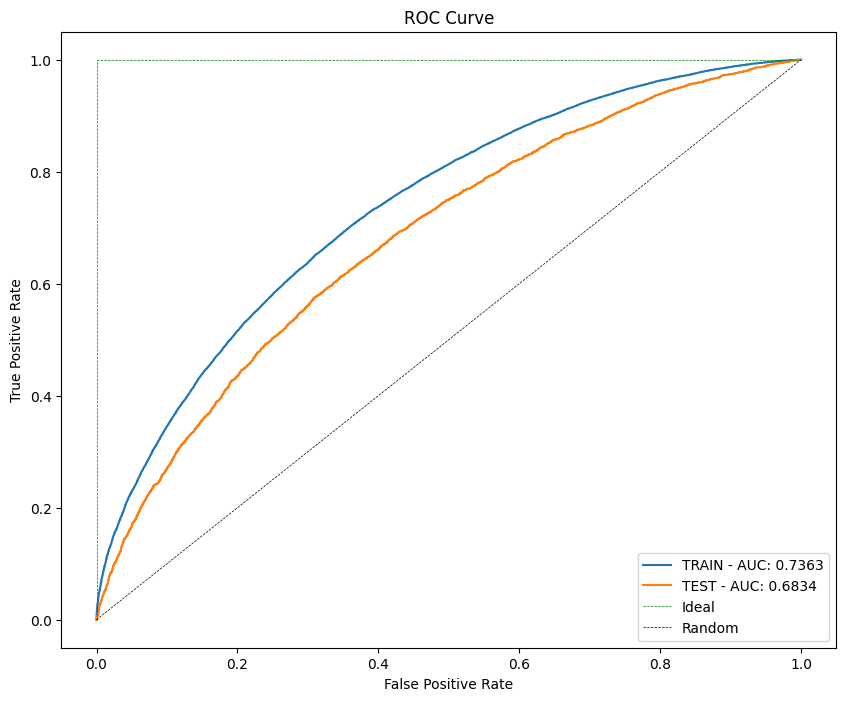

In [ ]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()



*   Al graficar el comportamiento de nuestro modelo entrenado en relación al test para evaluar la tasa de acierto que logra, observamos que la
ROC curve (Receiver Operating Characterictic)  nos enseña un modelo aceptable ya que su valor se encuentra en 0.7363. Un AUC comprendido entre 0.5-1 se considera un buen clasificador.

Del gráfico tambien se desprende que nuestro AUC test no ha caido en problemas de overfitting ya que si bien hay paralelismo con AUC train, no imita exactamente su comportamiento. A mayor área entre las curvas, es decir, cuanto más se acerque AUC test a la diagonal central y se aleje de AUC train, tanto más defectuoso el modelo, ya que clasificaria de manera aleatoria.

Arribamos a la conclusión que nuestro modelo podría considerarse bueno, pero suceptible de nuevos procesamientos que lo pudieran mejorar.



* Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred)

[]

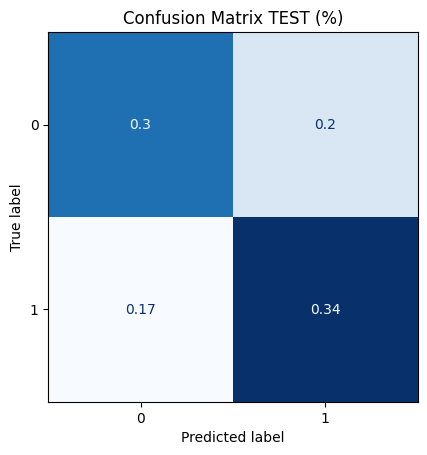

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

* Accuracy, Precision, Recall y F1-Score

In [ ]:
cm_test

array([[3990, 2656],
       [2327, 4527]])

In [ ]:
TN = cm_test[0,0]
TP = cm_test[1,1]
FP = cm_test[0,1]
FN = cm_test[1,0]
total = len(y_test)

In [ ]:
accuracy_test = (TN+TP)/total
precision_test = TP/(TP+FP)
recall_test = TP/(TP+FN)
f1_test = 2/(1/recall_test + 1/precision_test)

In [ ]:
print('Accuracy:',round(accuracy_test,4))
print('Precision:',round(precision_test,4))
print('Recall:',round(recall_test,4))
print('F1-score:',round(f1_test,4))

Accuracy: 0.6309
Precision: 0.6302
Recall: 0.6605
F1-score: 0.645




*   Para ponderar la eficacia del modelo para este proyecto, analizamos las métricas de accuracy, presicion, recall y F1-score.

Accuracy = 0.6309

Es el % de las predicciones positivas que son correctas.

Es una buena métrica si las categorías están equilibradas, nuestra base de datos muestra un balance adecuado entre clientes que se retiran y quienes permanencen.
Esta metrica nos indica los errores generales del AL. En nuestro proyecto predice correctamente en un 63% de los casos, sin embargo, suceptible de mejorarse.

Recall = 0.6605

Recall: % de las clases positivas reales que fueron predecidas correctamente. Nos da información sobre el rendimiento del clasificador puesto que  indica que tan bien nuestro algoritmo puede diferenciar entre verdaderos y falsos positivos

 F1:-score = 0.645

Es una ponderación de la precisión y recall, a diferencia del accuracy no se ve afectada por la distribución de la clase (positivos/negativos). Nos refleja la eficacia de un algoritmo de clasificación.



# INTERPRETABILITY

* Analizamos top features del modelo y su peso en el modelo.
* Plotear SHAP values y el impacto positivo/negativo.
* Comentar las top5 features, su impacto en el target y extraer insights.
* Analisis complementarios:
  * Modelos de arboles: Feature Importances, plot de arbol de decision.
  * Modelos lineales: Coeficentes y formula del modelo.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.4 MB/s eta 0:00:00


In [ ]:
import shap

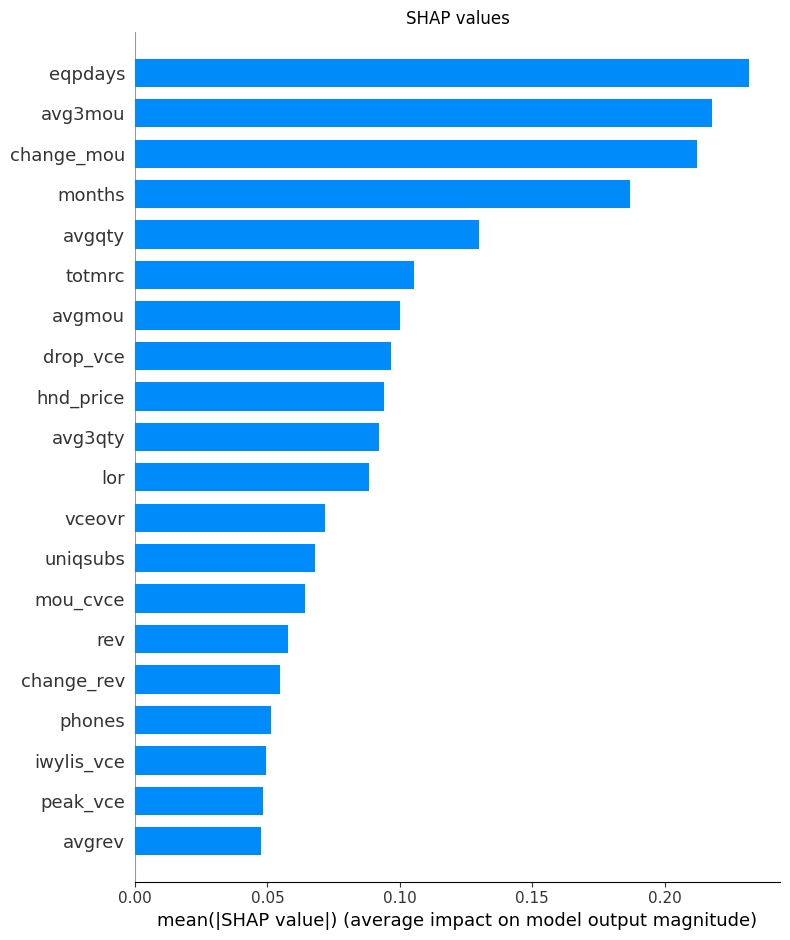

In [ ]:
#SHAP value: peso en el output final
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
plt.title('SHAP values')
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)

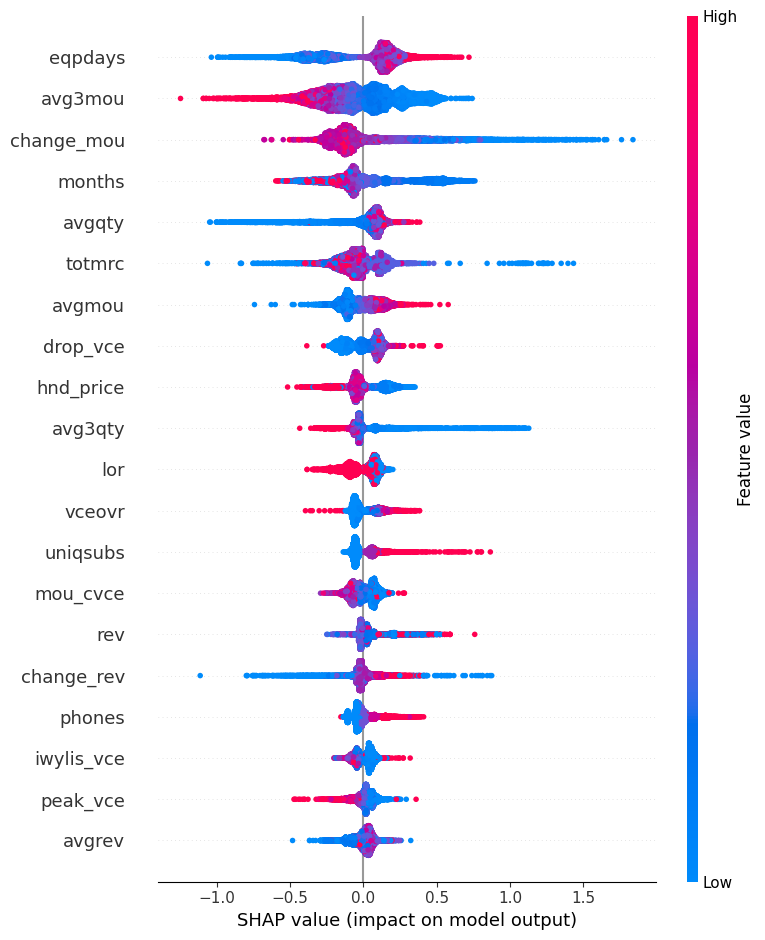

In [ ]:
shap.summary_plot(shap_values, X_test)

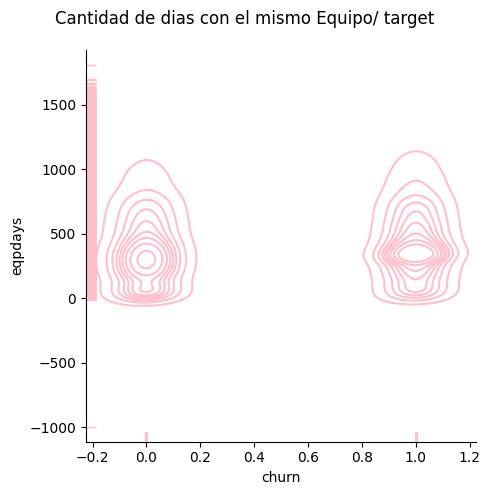

In [ ]:
eq = sns.displot(x='churn', y='eqpdays', color='pink', rug = True, kind = 'kde' , data= df)
eq.fig.suptitle("Cantidad de dias con el mismo Equipo/ target")
eq.fig.subplots_adjust(top = 0.9)

In [ ]:
df["eqpdays"].describe()

count    90000.000000
mean       402.403867
std        252.863409
min       -999.000000
25%        227.000000
50%        359.000000
75%        547.000000
max       1812.000000
Name: eqpdays, dtype: float64



*   eqpdays : Number of days (age) of current equipment  

Puede ser que los clientes hagan un cambio de compania cuando se les ofrece la posibilidad de hacer un cambio de dispositivo. Se podria revisar las estrategias de captacion de clientes de otras companias. Un ofrecimiento de financiamiento, o bajos costos de servicio por adquirir un movil nuevo con ellos, podrian ser factores de gran atraccion para realizar un cambio de compania apoyado tambien por dos factores; la facilidad actual de la portabilidad de numero de telefono y la eliminacion de las clausulas de permanencia preestablecida en un servicio de este tipo. Al relacionar graficamente target y eqpdays, observamos que hay una concetracion de clientes que se retiran a los 400 dias aproximadamente con una mayor variabilidad de clientes entre aquello que se retiran-> Churn = 1.

Al tomar la media de la variable eqpdays , obtenemos: 402.419. Esto quiere decir que el tiempo promedio de permanencia con la empresa es de UN año y medio aproximadamente. Por la alta tasa de consumo de dispositivos moviles y la rapidez con que se actualizan los modelos en mercado, podria considerase razonable que un factor imporante en la decision de mantenerse en una compania o retirarse a otra, sea de hecho, la posibilidad de actualizar el disposivito por un modelo mas reciente asociado tambien a las facilidades actuales de hacer este tipo de saltos entre companias.

Se propone investigar las estrategias de captacion de clientes con estos beneficios y analizar asi la posible fuga de clientes .

In [ ]:
df['avg3mou'].describe()

count    90000.000000
mean       510.539844
std        524.737209
min          0.000000
25%        150.000000
50%        351.000000
75%        697.000000
max       7716.000000
Name: avg3mou, dtype: float64



*  avgmou : Average monthly minutes of use over the life of the client

Esta variable - avgmou- nos refiere al historico de uso de cada cliente en minutos. Es decir, cuanto tiempo en minutos ha usado el servicio desde que incia hasta que termina la relacion contractual. Observamos que la media de uso es de 480 minutos y un valor maximo de 7050 min. Estos valores nos podrian acercar a la idea de la cantidad de  minutos que se podria ofrecer por tarifa. Sin embargo, esta variable nos resulta poco fiable ya que al investigar sobre el uso promedio de un usuario de su telefono movil en intenet, nos encontramos con que en España, el promedio es 183min/mes. De modo que 480 min de media para TODO el ciclo de vida del cliente parece incorrecto.



In [ ]:
consumo_neg = df[df['change_mou']<=0].index
len(consumo_neg)

50721

In [ ]:
consumo_pos = df[df['change_mou']>=0].index
len(consumo_pos) / len(df['change_mou'])

0.45397777777777776

In [ ]:
proporcion_pos = len(consumo_pos) / len(df['change_mou'])
proporcion_pos

0.45397777777777776



*   change_mou : Percentage change in monthly minutes of use.

La variable change_mou refleja el cambio en el consumo mensual medio de minutos, esto quiere decir que si el Porcentaje es 0%, el cliente ha consumido la misma cantidad de minutos promedio que el mes anterior, es decir que ha mantenido su consumo mensual. Un valor negativo indicaria que el cliente uso menos el telefono en el mes actual en relacion al anterior. Y por ultimo un valor de porcentual mayor a cero, nos indica que hubo un incremento en el uso del servicio en minutos. Esta variable podria soportar tambien la variable anterior que refleja la cantidad de minutos usados concretamente.

El 45% de los clientes bajo la variable change_mou ha incremetado el uso de los minutos. Si la lina de razonamiento de la variable anterior se tiene como eje, concluimos que una diferencia positiva en el consumo de minutos, ya sea por valor numerico o porcentual, podrian afectar al abandono del cliente si esto supone un costo adicional o se encuentra limitado en el uso de minutos mensuales por la tarifa que ha contratado. Otra compania podria estar ofrenciendo minutos ilimitados, logrando captar el cliente aun que la oferta del precio del servicio sea la misma.




array([[<Axes: title={'center': 'months'}>]], dtype=object)

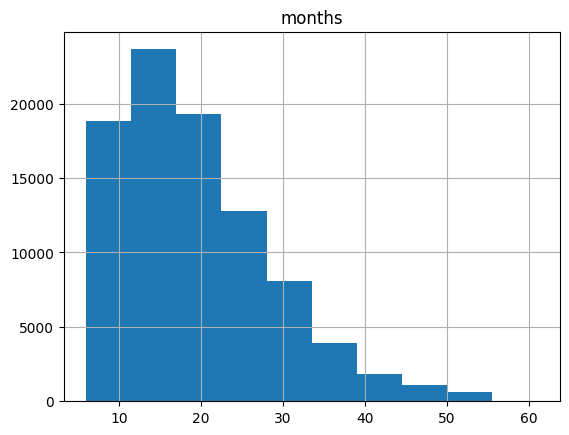

In [ ]:
df.hist('months')

In [ ]:
df['months'].describe()

count    90000.000000
mean        19.263856
std          9.149764
min          6.000000
25%         12.000000
50%         17.000000
75%         24.000000
max         61.000000
Name: months, dtype: float64

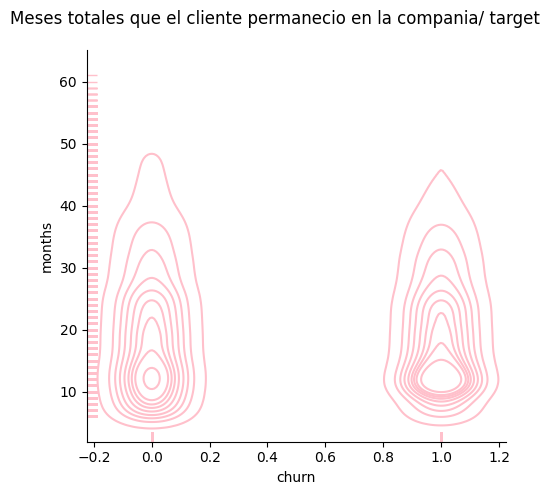

In [ ]:
mon = sns.displot(x='churn', y='months', color='pink', rug = True, kind = 'kde' , data= df)
mon.fig.suptitle("Meses totales que el cliente permanecio en la compania/ target")
mon.fig.subplots_adjust(top = 0.9)

In [ ]:
df[df['months']>=17]

,rev,totmrc,ovrmou,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,recv_sms,comp_dat,custcare,cc_mou,inonemin,threeway,mou_cvce,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,truck_bool,rv_bool,forgntvl_bool,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_B,crclscod_BA,crclscod_C,crclscod_CA,crclscod_DA,crclscod_EA,crclscod_ZA,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_Mid-Atlantic,area_Midwest,area_Northeast,area_Southeast,area_Southwest,area_West,dualband_N,dualband_T,dualband_Y,refurb_new_R,hnd_webcap_WCMB,ownrent_R,dwlltype_S,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,kid0_2_Y,kid3_5_Y,kid6_10_Y,kid11_15_Y,kid16_17_Y,creditcd_Y
0,23.9975,22.500,0.00,0.00,0.0,0.0000,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,0.0,0.0,0.000000,0.000000,18.000000,0.000000,90.643333,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,45.000000,0.0,0.333333,1,61,2,1,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,15.0,1.0,4.0,3.0,361.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,57.4925,37.425,22.75,9.10,0.0,0.0000,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,0.0,0.0,1.666667,5.463333,53.000000,0.333333,189.396667,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,193.333333,0.0,5.666667,0,56,1,1,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,-999.00000,7.0,6.0,1.0,1.0,5.0,1.0,240.0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,16.9900,16.990,0.00,0.00,0.0,0.0000,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,0.0,0.0,0.000000,0.000000,0.333333,0.000000,5.426667,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,6.000000,0.0,0.000000,1,58,1,1,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,29.98999,2.0,1.0,7.0,2.0,5.0,2.0,1504.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,38.0000,38.000,0.00,0.00,0.0,0.0000,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.333333,0.000000,8.410000,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,0.0,0.000000,0,60,1,1,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,29.98999,1.0,1.0,6.0,4.0,6.0,1.0,1812.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1
4,55.2300,71.980,0.00,0.00,0.0,0.0000,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,0.0,0.0,8.666667,11.076667,66.000000,0.000000,285.233333,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,137.000000,0.0,0.000000,0,57,1,1,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,149.98999,6.0,4.0,5.0,1.0,6.0,1.0,434.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,.

In [ ]:
df[df['months']<=17]

,rev,totmrc,ovrmou,vceovr,datovr,roam,change_mou,change_rev,drop_vce,drop_dat,blck_vce,blck_dat,unan_vce,unan_dat,recv_sms,comp_dat,custcare,cc_mou,inonemin,threeway,mou_cvce,mou_rvce,owylis_vce,mouowylisv,iwylis_vce,mouiwylisv,peak_vce,peak_dat,mou_peav,mou_pead,opk_vce,opk_dat,mou_opkv,mou_opkd,drop_blk,complete,callfwdv,callwait,churn,months,uniqsubs,actvsubs,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,lor,adults,income,numbcars,eqpdays,truck_bool,rv_bool,forgntvl_bool,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_AA,crclscod_B,crclscod_BA,crclscod_C,crclscod_CA,crclscod_DA,crclscod_EA,crclscod_ZA,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_Mid-Atlantic,area_Midwest,area_Northeast,area_Southeast,area_Southwest,area_West,dualband_N,dualband_T,dualband_Y,refurb_new_R,hnd_webcap_WCMB,ownrent_R,dwlltype_S,marital_A,marital_B,marital_M,marital_S,marital_U,HHstatin_A,HHstatin_B,HHstatin_C,HHstatin_G,HHstatin_H,HHstatin_I,dwllsize_A,dwllsize_B,dwllsize_C,dwllsize_J,dwllsize_O,ethnic_B,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_N,ethnic_O,ethnic_R,ethnic_S,ethnic_U,ethnic_Z,kid0_2_Y,kid3_5_Y,kid6_10_Y,kid11_15_Y,kid16_17_Y,creditcd_Y
10913,97.1150,59.9900,143.75,43.1250,0.000,0.0000,-265.00,-43.1250,19.000000,0.0,2.000000,0.0,66.333333,0.000000,0.0,0.0,3.333333,2.170000,50.000000,0.000000,210.056667,109.623333,107.000000,112.406667,32.000000,41.430000,188.666667,0.0,222.263333,0.0,78.333333,0.0,97.416667,0.0,21.000000,199.333333,0.0,3.666667,0,12,2,1,835.62,5448.0,2719,83.56,544.80,271.90,529,271,111,490.0,241.0,92.0,199.98999,2.0,2.0,2.0,2.0,2.0,1.0,20.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
15586,43.2625,28.7025,52.00,18.2000,0.000,0.0000,-49.25,-39.4925,28.000000,0.0,5.666667,0.0,53.000000,0.000000,0.0,0.0,2.333333,14.273333,70.333333,0.666667,144.086667,108.646667,60.333333,35.976667,11.000000,11.746667,90.333333,0.0,88.020000,0.0,200.666667,0.0,164.713333,0.0,33.666667,200.666667,0.0,5.666667,1,13,1,1,673.69,9512.0,5668,56.14,792.67,472.33,529,330,56,638.0,382.0,60.0,79.98999,3.0,3.0,-999.0,2.0,-999.0,-999.0,63.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16380,26.7825,24.6450,0.00,0.0000,0.000,0.0000,4.25,5.7575,2.666667,0.0,0.000000,0.0,22.666667,0.000000,0.0,0.0,7.333333,59.986667,29.333333,0.333333,121.606667,57.986667,10.666667,12.183333,3.666667,4.283333,49.000000,0.0,119.300000,0.0,46.000000,0.0,60.290000,0.0,2.666667,63.000000,0.0,0.000000,1,8,1,1,291.33,1461.0,569,48.56,243.50,94.83,165,77,25,244.0,95.0,49.0,59.98999,1.0,1.0,-999.0,3.0,-999.0,-999.0,237.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
18955,32.8925,49.5750,0.00,0.0000,0.000,0.0000,45.50,14.1675,1.666667,0.0,1.333333,0.0,5.666667,0.000000,0.0,0.0,0.666667,3.050000,10.333333,0.000000,39.606667,26.030000,5.666667,4.710000,2.333333,2.173333,35.666667,0.0,48.066667,0.0,16.333333,0.0,17.570000,0.0,3.000000,33.000000,0.0,0.000000,0,8,2,1,240.28,445.0,226,34.33,63.57,32.29,80,41,28,65.0,33.0,32.0,199.98999,1.0,1.0,2.0,2.0,5.0,-999.0,255.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
19455,30.3350,39.9900,0.25,0.0875,0.000,0.2575,-101.25,-0.3450,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0,10,2,2,370.39,3490.0,1180,41.15,387.78,131.11,378,136,30,353.0,127.0,41.0,399.98999,2.0,2.0,1.0,1.0,5.0,-999.0,61.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0



*  months : Total number of months in service.

Months es la variable que describe la cantidad de meses que un cliente permanecio tomando el servicio. De esta grafica podemos observar que la permanencia media con un Churn= 1, es de 17 meses. Esto es correlacinable con la primera feature -avg3mou- que indicaba la cantidad de dias de permanencia. De esta última,  obtuvimos una media de 400 dias, lo cual es coherente con una permanencia de entre 13-17 meses (entre 400 y 500 dias -avg3mou-).

Como la proporcion de permanencia o abandono es muy similar entre los grupos de clientes para esa media de permancia, si asumimos que la bisagra de permanencia en meses se establece en 17, podriamos plantear estratagias de retencion del cliente para aquellos 45k que tienen mayor potencial de retirarse. Evaluar la satisfaccion del cliente y afrecerle alguna actualizacion del servicio o algun beneficio, nos ayudaria a aumentar el numero de clientes que superen una permanencia de 17 meses en la compania.




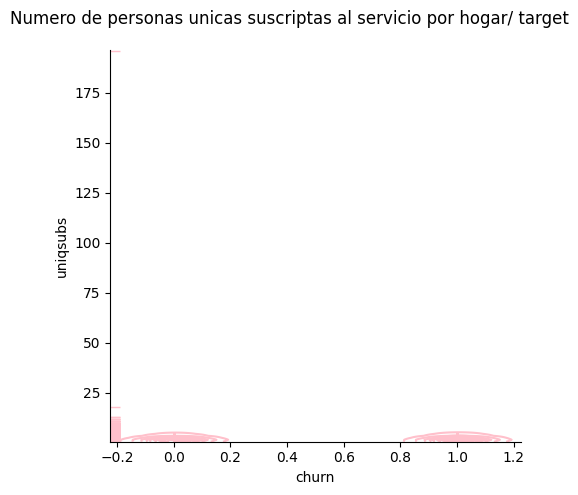

In [ ]:
uniq = sns.displot(x='churn', y='uniqsubs', color='pink', rug = True, kind = 'kde' , data= df)
uniq.fig.suptitle("Numero de personas unicas suscriptas al servicio por hogar/ target")
uniq.fig.subplots_adjust(top = 0.9)

In [ ]:
df['uniqsubs'].describe()

count    90000.000000
mean         1.555067
std          1.095305
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        196.000000
Name: uniqsubs, dtype: float64



*   uniqsubs : numero de personas unicas suscriptas al servicio en un hogar.

Refleja el numero de personas registradas al servicio bajo el mismo nombre de cliente, es decir, si tiene mas lineas asociadas al servicio. Esto es propio de grupos familiares que se adicionan al servicio para disminuir costos por grupo familiar. Esta variable nos indica que en promedio hay una sola persona por servicio contratado. Seria interesante poder extender la permanencia de un usuario al asociarlo con mas lineas posibles a una unica tarifa de manera de simplificar los diferentes servicios de telefonia que una misma unidad familiar posea. Es probable que el ofrecimiento de un paquete compartido para miembros de la familia o integrantes de la unidad habitacional, sea una propuesta interesante para fidelizar clientes. Aun asi esta variable no nos aporta informacion significativa para comprender por que se retirarian del servicio. Podriamos asumir su potencial en caso de saber la norma de la compania en terminos de cuantas personas máximo se pueden añadir a un único plan.



In [ ]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/DSC 0523– Entregable 2 - Borrero, Dottori, He/Modelo/EJERCICIO-ML-Sup/data/traintest.pkl', 'wb'))